<a href="https://colab.research.google.com/github/RufinoMartin/DataScience2021/blob/main/Notebook_Integrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook de Integracion de 3 dataframes previamente elaborados:

- df_Restricciones_Covid
- df_Indices_Commodities
- df_Indices_Bursatiles

Se generará a partir de ellos un unico Dataframe, se realizarán analisis multivariados y a partir de los hallazgos se consolidará la hipotesis de trabajo. 


In [43]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import pandas_profiling
from pandas_profiling import ProfileReport
from functools import reduce
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Por el gran tamaño de los datasets, se ha realizado una digestion previa de los mismos. 

Para acceder a los notebooks preliminares donde se realizó dicha labor:

 https://github.com/RufinoMartin/DataScience2021
 
 El resultado de la misma han sido tres archivos, que procedemos a importar, y que de no funcionar el pd.read, se encuentran disponibles con la terminacion de "_Final.csv" en el repositorio. Copiar el URL del Raw, y pegar:
 

In [44]:
df_Restricciones_Covid = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/DataScience2021/main/Restricciones_Covid_Final.csv?token=GHSAT0AAAAAABRYGSF3IT2QZGYT6HRCLDEUYRXRWVQ')

In [45]:
df_Indices_Commodities = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/DataScience2021/main/Indices_Commodities_Final.csv?token=GHSAT0AAAAAABRYGSF2QRVKEXB73TEDDUHOYRXRWMA')

In [46]:
df_Indices_Bursatiles = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/DataScience2021/main/Indices_Bursatiles_Final.csv?token=GHSAT0AAAAAABRYGSF36WRYOXXWCS66FONSYRXRWDA')

Indices utilizados:

DOLAR : "DYX" (The U.S. Dollar Index is used to measure the value of the dollar against a basket of six world currencies: Euro, Swiss Franc, Japanese Yen, Canadian dollar, British pound, and Swedish Krona)

USA : "S&P500" ("Standard and Poor 500" is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States)

CHINA: "SHA" (The Shanghai Stock Exchange is one of the three stock exchanges operating independently in mainland China. The Shanghai Stock Exchange is the world's 3rd largest stock market by market capitalization at US$7.62 trillion as of July 2021)

EUROPA :

"UKX" (The "FTSE 100 Index" The Financial Times Stock Exchange 100 Index, is a share index of the 100 companies listed on the London Stock Exchange with the highest market capitalisation.

"SX5P" (The STOXX Europe 50 index provides a blue-chip representation of supersector leaders in Europe covering almost 50% of the free-float market capitalization of the European stock market.)

- Indices de Comoddities Desarrollados por el Fondo Monetario Internacional:
 
 Alimentos,	Industrial,	Agro,	Metales, Energia y Promedio.

In [ ]:
df_Restricciones_Covid.head(1)

,Unnamed: 0,CountryName,DateTime,StringencyIndex,ContainmentHealthIndex,EconomicSupportIndex,GovernmentResponseIndex
0,0,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0


In [ ]:
# Exploracion basica de cada Dataframe

In [47]:
#Probamos unir los dataframes

dfs = [df_Restricciones_Covid, df_Indices_Commodities, df_Indices_Bursatiles]

In [48]:
df_Integrado = reduce(lambda  left,right: pd.merge(left,right,on=['DateTime'],
                                            how='outer'), dfs).fillna('0')

In [50]:
df_Integrado.drop(columns={'Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'}, inplace=True)

In [53]:
df_Integrado.rename(columns={'Promedio': 'Promedio Commodities'}, inplace=True)

In [56]:
df_Integrado = df_Integrado.sort_values(by=['DateTime'])

In [57]:
df_Integrado.head(5)

,CountryName,DateTime,StringencyIndex,ContainmentHealthIndex,EconomicSupportIndex,GovernmentResponseIndex,Alimentos,Industrial,Agro,Metales,Energia,Promedio Commodities,$DYX,$S&P500,$SHA,$UKX,$SX5P
8424,0,2019-01-01,0,0,0,0,100.466542,118.836909,103.53615,114.711385,133.302098,117.078244,95.58,2704.10,2584.57,6968.85,2897.13
8425,0,2019-02-01,0,0,0,0,98.772205,125.808562,103.60878,120.811052,136.048817,119.011525,96.16,2709.80,2940.95,7074.73,3029.67
8426,0,2019-03-01,0,0,0,0,98.06311,127.539176,105.409046,121.105733,138.256367,119.910036,97.28,2834.40,3090.76,7279.19,3117.01
8427,0,2019-04-01,0,0,0,0,101.569201,129.656529,104.681017,121.924057,143.768294,123.416731,97.48,2945.83,3078.34,7418.22,3199.51
8428,0,2019-05-01,0,0,0,0,98.094289,129.330578,105.43636,121.161561,139.410557,120.477541,97.61,2752.06,2898.70,7161.71,3042.89


In [58]:
df_Integrado.info

<bound method DataFrame.info of      CountryName    DateTime StringencyIndex ContainmentHealthIndex EconomicSupportIndex GovernmentResponseIndex   Alimentos  Industrial        Agro     Metales     Energia Promedio Commodities   $DYX  $S&P500     $SHA     $UKX    $SX5P
8424           0  2019-01-01               0                      0                    0                       0  100.466542  118.836909   103.53615  114.711385  133.302098           117.078244  95.58  2704.10  2584.57  6968.85  2897.13
8425           0  2019-02-01               0                      0                    0                       0   98.772205  125.808562   103.60878  120.811052  136.048817           119.011525  96.16  2709.80  2940.95  7074.73  3029.67
8426           0  2019-03-01               0                      0                    0                       0    98.06311  127.539176  105.409046  121.105733  138.256367           119.910036  97.28  2834.40  3090.76  7279.19  3117.01
8427           0  20

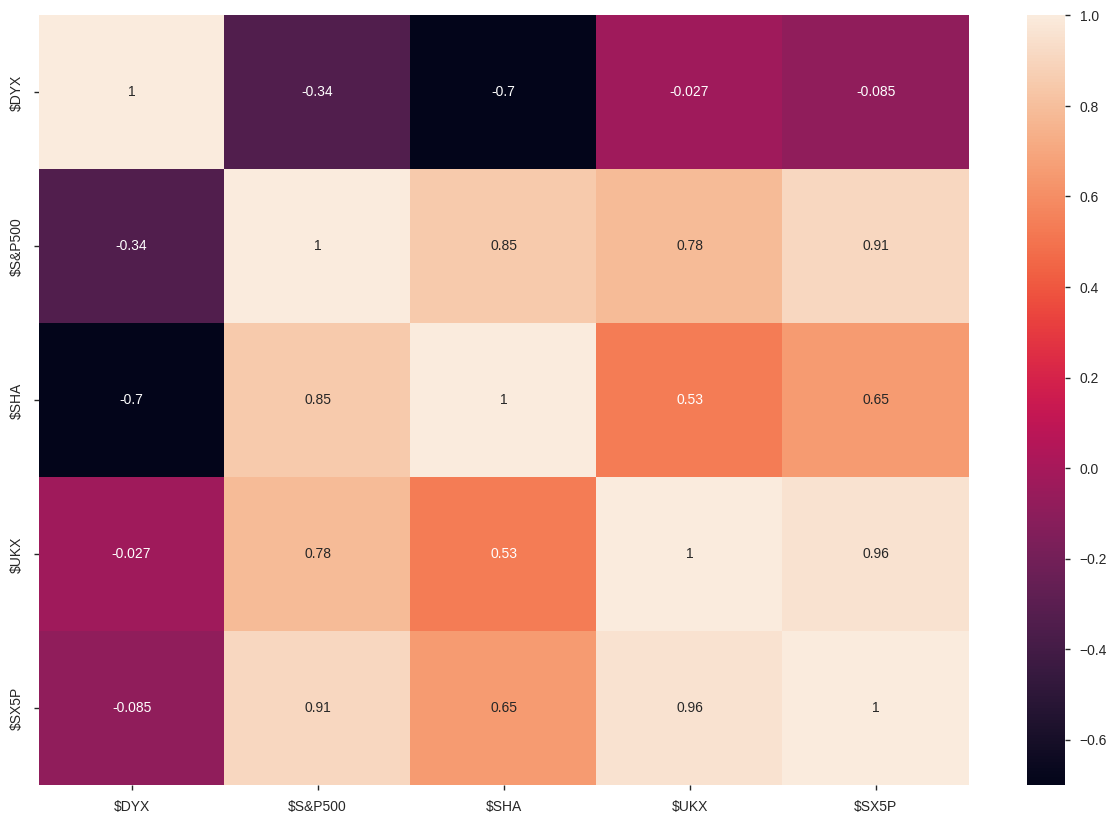

In [59]:
#Correlaciones de Heatmap

plt.figure(figsize=(15, 10))

heatmap_test = df_Integrado.corr()
sns.heatmap(heatmap_test, 
            xticklabels = heatmap_test.columns.values,
            yticklabels = heatmap_test.columns.values,
            annot = True);

TypeError: ignored

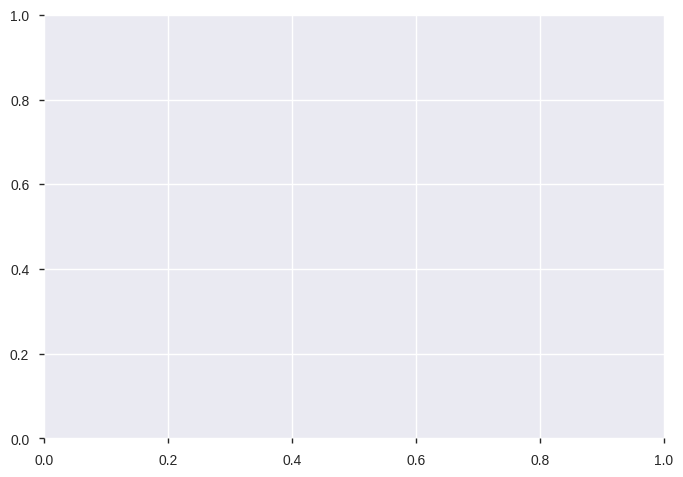

In [60]:
#Boxplot
#Scatterplot
df_Integrado.plot.scatter(x= 'GovernmentResponseIndex', y='ContainmentHealthIndex')

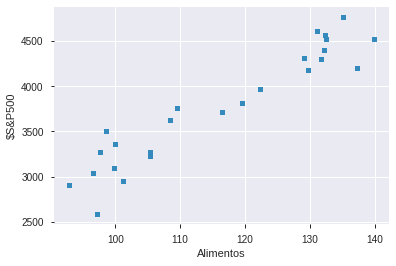

In [ ]:
#Boxplot
#Scatterplot
df_Integrado.plot.scatter(x= 'Alimentos', y='$S&P500')

In [ ]:
df_Integrado.groupby('Alimentos')['Industrial'].describe()

,count,mean,std,min,25%,50%,75%,max
Alimentos,,,,,,,,
92.933630,312.0,108.406682,5.266463e-13,108.406682,108.406682,108.406682,108.406682,108.406682
96.516706,312.0,112.803065,5.551137e-13,112.803065,112.803065,112.803065,112.803065,112.803065
97.199983,312.0,113.212799,1.138695e-13,113.212799,113.212799,113.212799,113.212799,113.212799
97.635718,312.0,125.860440,3.843095e-13,125.860440,125.860440,125.860440,125.860440,125.860440
98.623680,312.0,133.782004,3.985431e-13,133.782004,133.782004,133.782004,133.782004,133.782004
99.805668,312.0,120.717372,1.708042e-13,120.717372,120.717372,120.717372,120.717372,120.717372
99.999653,312.0,136.651739,5.978147e-13,136.651739,136.651739,136.651739,136.651739,136.651739
101.111476,312.0,118.312896,2.419726e-13,118.312896,118.312896,118.312896,118.312896,118.312896
105.348153,312.0,137.755864,1.138695e-13,137.755864,137.755864,137.755864,137.755864,137.755864


In [ ]:
%matplotlib inline
plt.close('all')

<Figure size 6000x4500 with 0 Axes>

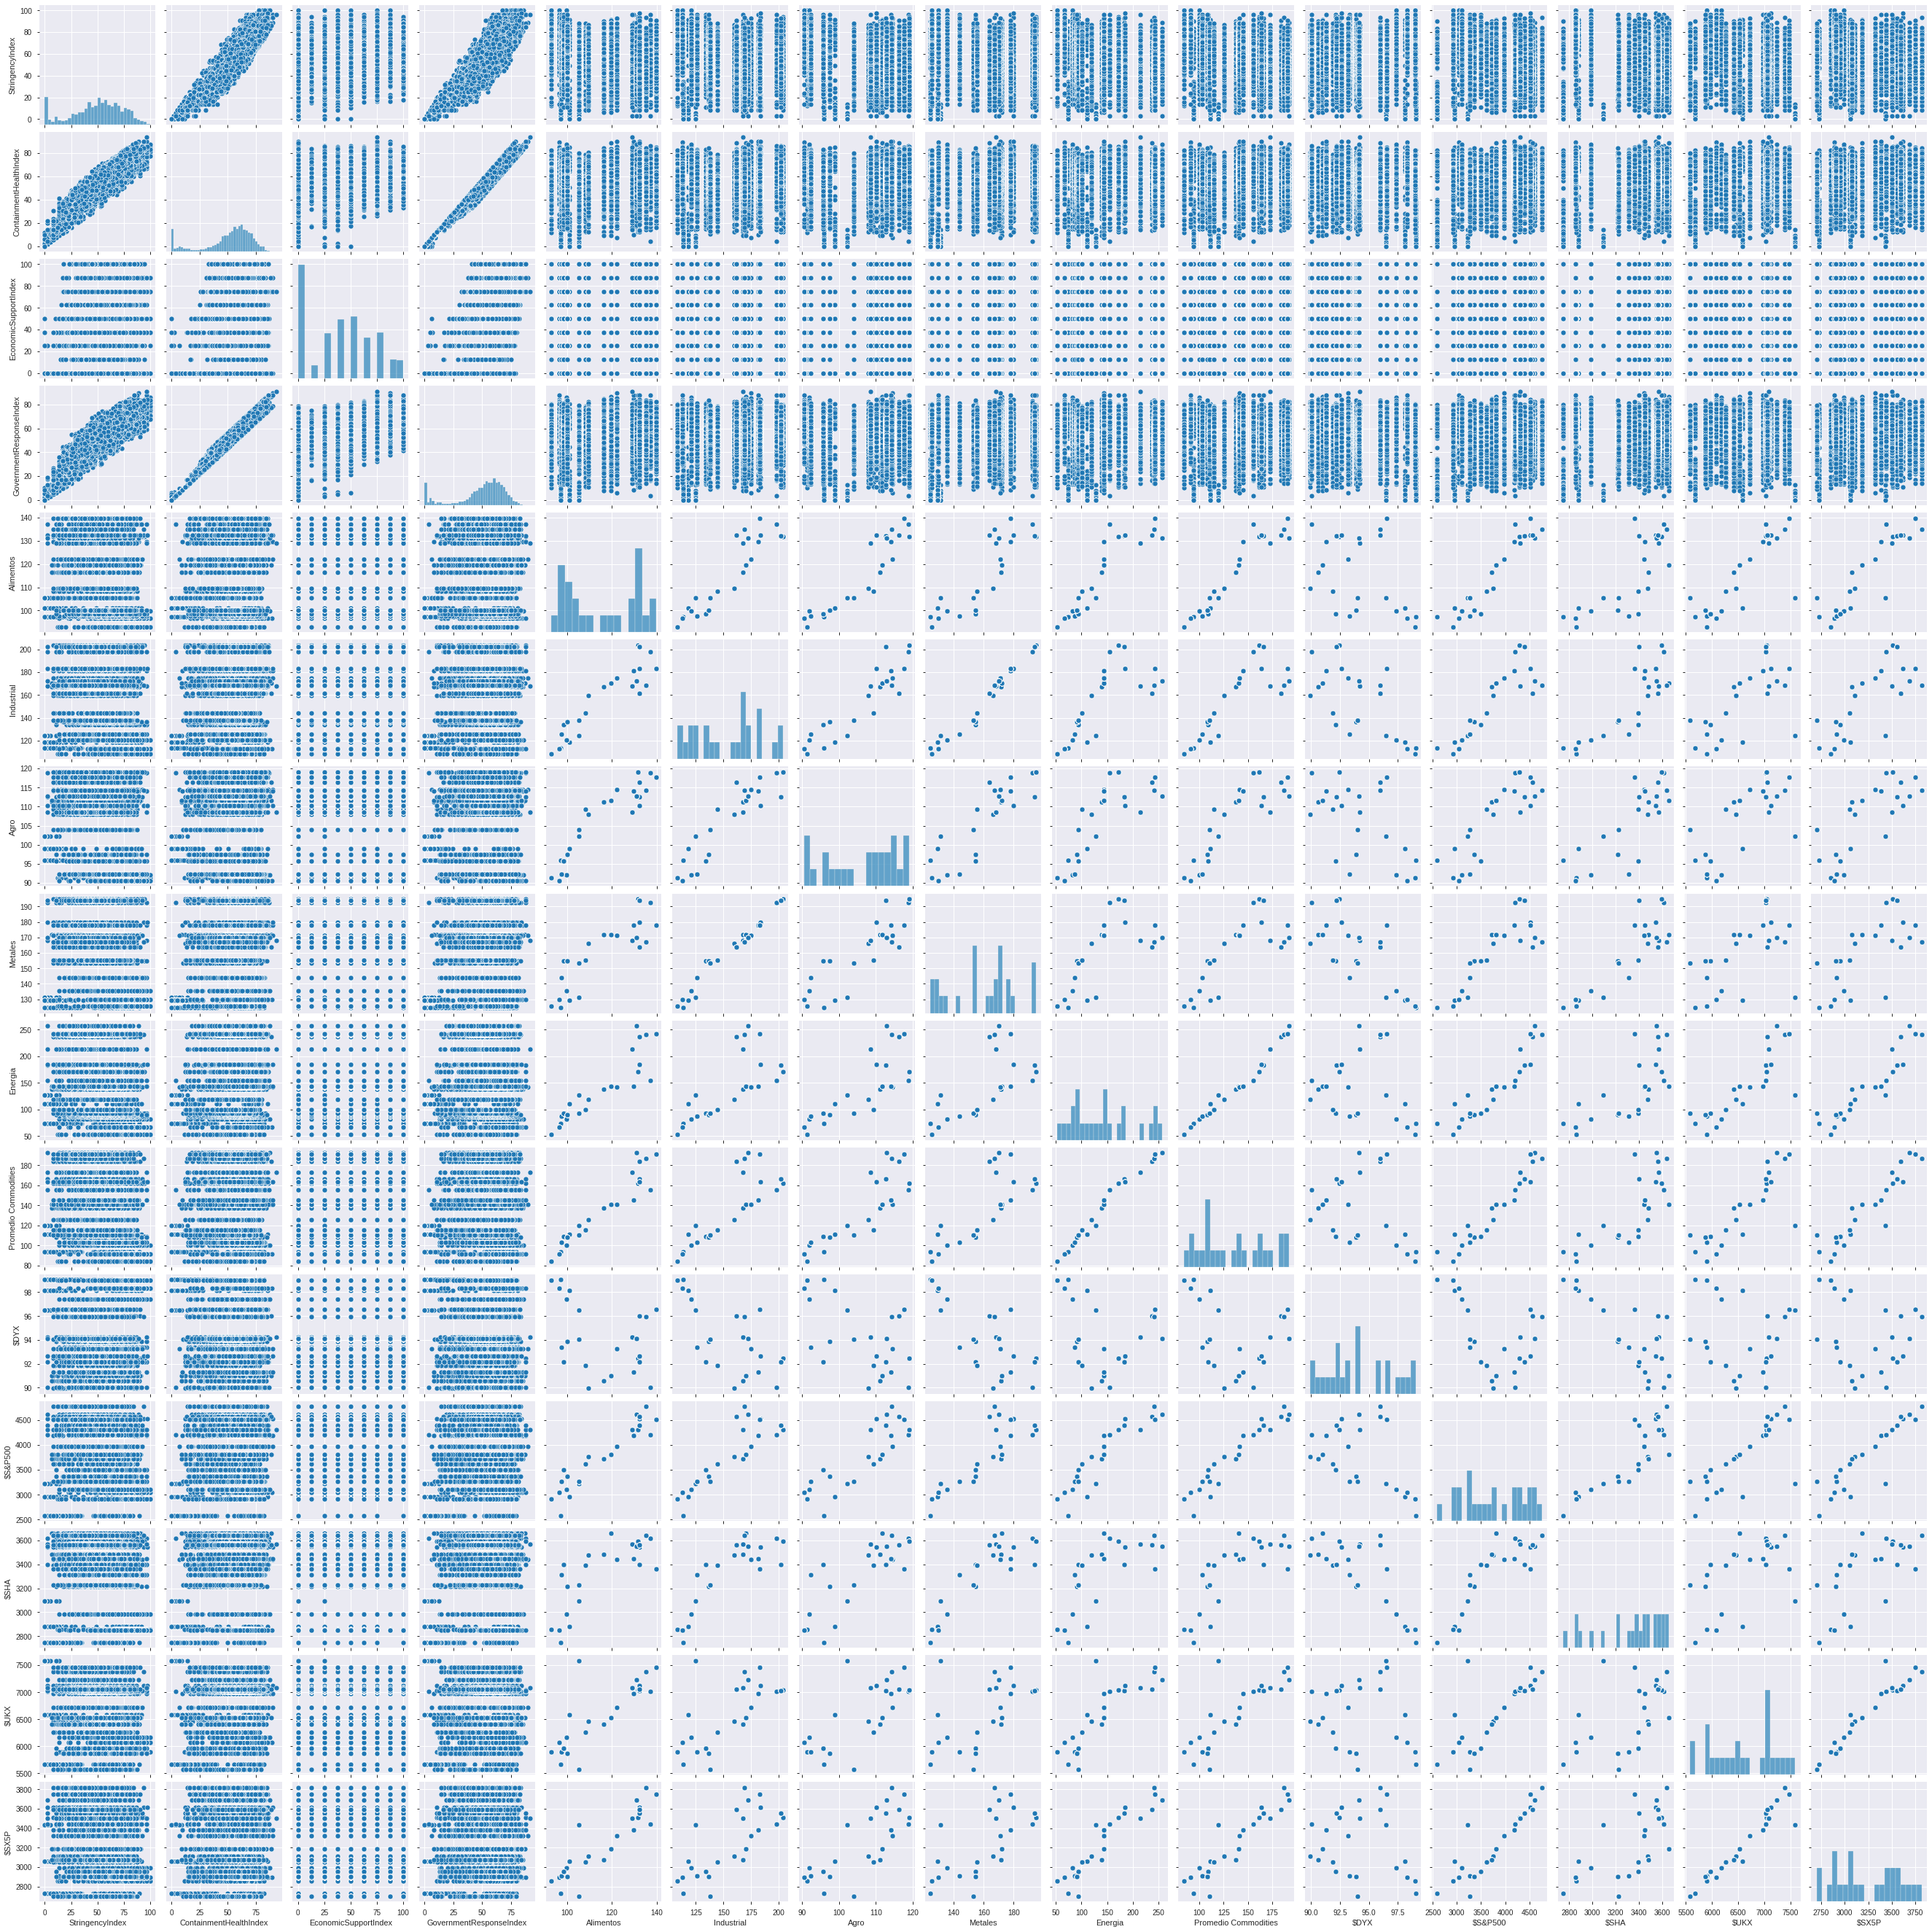

In [ ]:
#Crear un Pairplot del dataset
plt.figure(dpi=500)
sns.pairplot(df_Integrado)
plt.show()

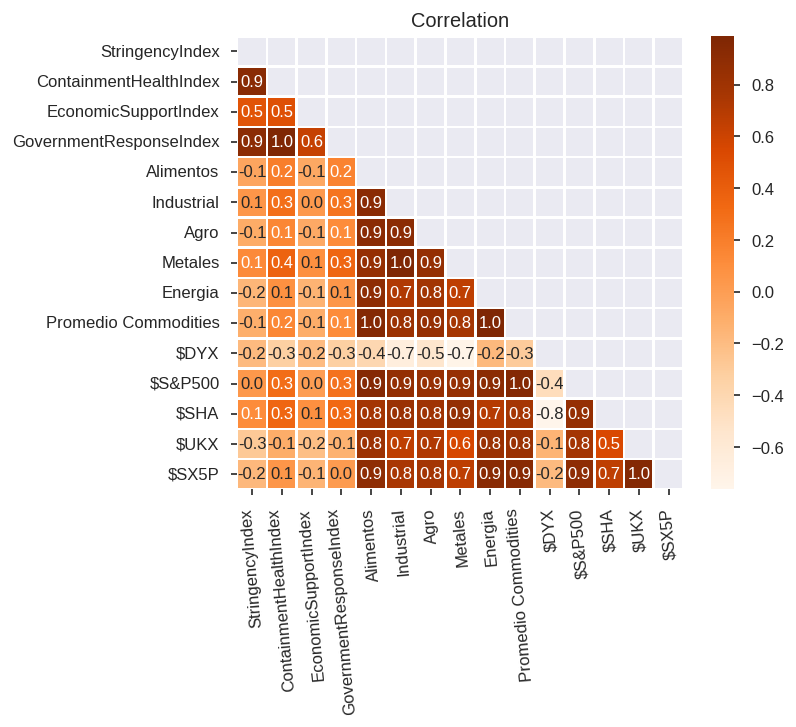

In [ ]:
#Correlaciones
plt.figure(dpi = 120,figsize= (6,5))
mask = np.triu(np.ones_like(df_Integrado.corr(),dtype = bool))
sns.heatmap(df_Integrado.corr(),mask = mask, fmt = ".1f",annot=True,lw=1,cmap = 'Oranges')
plt.yticks(rotation = 0)
plt.xticks(rotation = 95)
plt.title('Correlation')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


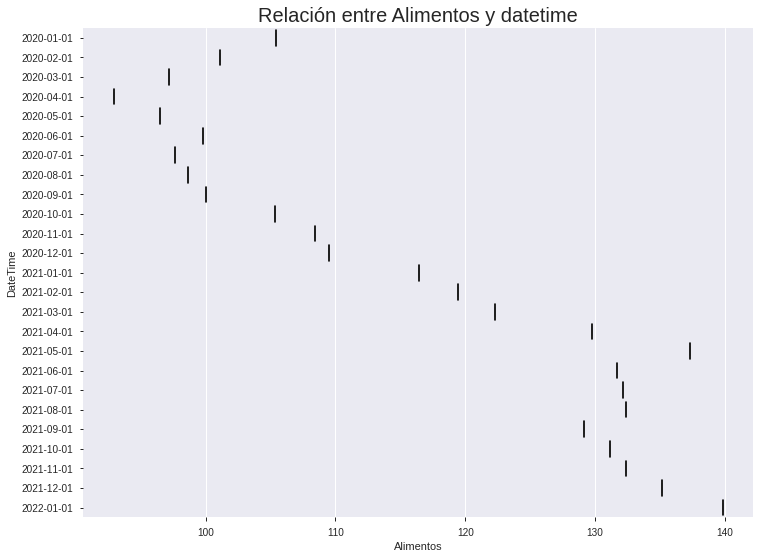

In [ ]:
# tresbps vs date time
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df_Integrado['Alimentos'], df_Integrado['DateTime'], palette = 'viridis')
plt.title('Relación entre Alimentos y datetime', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Relacion entre Alimentos y el sector industrial')

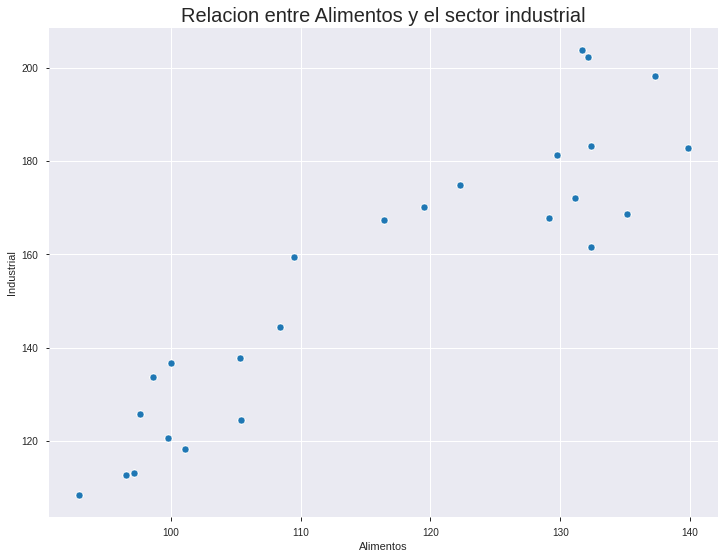

In [ ]:
sns.scatterplot(x="Alimentos", y="Industrial", data=df_Integrado)
plt.title('Relacion entre Alimentos y el sector industrial', fontsize = 20, fontweight = 30)